## Support Vector Regressor Implementation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
## let Create Synthetic Data points
from sklearn.datasets import make_regression

In [24]:
X,y =  make_regression(n_samples=1000, n_features=2, n_targets=1, noise=3.0)

In [25]:
X

array([[ 0.00852812, -0.4578433 ],
       [ 0.00270291, -0.57057688],
       [-1.30379262,  1.06665105],
       ...,
       [ 1.1438208 , -0.46838521],
       [ 0.72369751, -0.09496916],
       [-0.12038368,  0.5017547 ]])

In [26]:
y

array([-1.97248377e+01, -1.96720820e+01,  1.14058368e+00, -4.07710022e+01,
        2.67714418e+01,  2.12783829e+00,  3.35072167e+01, -1.07283885e+02,
        1.59782190e+01,  3.58235713e+01,  8.24922219e+01,  1.86306496e+01,
        6.00888900e+00,  7.87662872e+01,  5.12026061e+01, -2.13586268e+01,
       -5.44087350e+00, -9.19936607e+00, -1.06417477e+01,  2.60283904e+01,
        8.57905507e+01,  1.09702754e+01, -5.83802571e+01,  8.67424499e+00,
       -3.75580691e+01,  2.82872644e+01, -2.06051230e+01, -2.17990541e+01,
       -7.53645460e-01,  3.49728538e+01, -2.01329582e+01,  2.41140429e+01,
        6.10652833e+01, -9.74141091e+00,  1.07018018e+02, -3.42114186e+01,
       -1.95594037e+01, -4.38824542e+01, -3.08525289e+01, -4.28699264e-01,
        1.26075639e+02,  4.91315133e+01,  2.57986567e+01,  9.93685404e+00,
       -5.35789827e+01, -4.12084716e+01, -5.30094766e+01,  2.91760379e+01,
        6.75601874e+01, -2.37496227e+01,  7.57593612e+00, -4.21265266e+01,
        7.98648979e+01, -

In [27]:
pd.DataFrame(X)[0]

0      0.008528
1      0.002703
2     -1.303793
3     -0.359689
4      0.483605
         ...   
995   -1.523146
996   -0.237668
997    1.143821
998    0.723698
999   -0.120384
Name: 0, Length: 1000, dtype: float64

<AxesSubplot: xlabel='0', ylabel='1'>

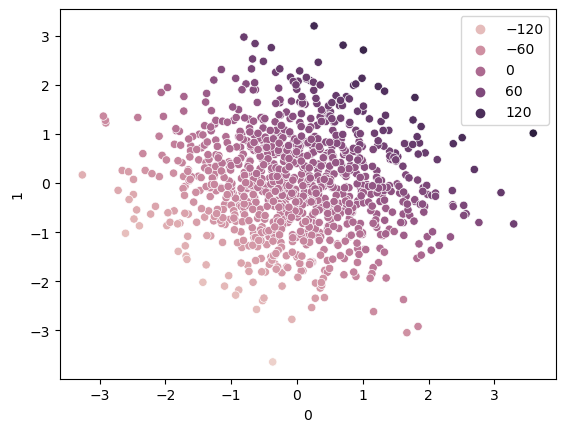

In [28]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1],hue=y)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=10)

In [34]:
from sklearn.svm import SVR

In [35]:
svr=SVR(kernel='linear')

In [36]:
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [37]:
svr.coef_

array([[32.85959744, 37.60286772]])

In [38]:
## Prediction
y_pred=svr.predict(X_test)

In [39]:
y_pred

array([ 7.44342984e+01, -4.52979595e+01, -1.60063199e+01,  4.52184105e+01,
        2.53786354e+01,  3.82993702e+01,  2.94064935e+01, -5.26130093e+01,
        1.23223051e+01,  3.84494324e+01,  1.43694657e+01, -4.21605595e+01,
       -6.73579756e+01, -4.22212686e+01,  1.59347616e+01,  6.99856460e+01,
        2.77511518e+01, -5.59833705e+01, -1.07729367e+01, -6.59641440e+00,
        4.03100920e+00,  4.61751101e+00,  3.23789775e+01,  1.55898530e+01,
       -8.51603277e+01, -4.54571111e+00, -4.85684739e+01,  5.60430783e+01,
        1.98323867e+01,  2.51745286e+01, -1.11268816e+02, -6.93491990e+01,
        4.54744646e+01, -4.97323868e+01, -4.14238972e+01, -6.00977855e-01,
        8.52475214e+01,  3.50972223e+01, -3.21423248e+01, -3.28488709e+01,
        8.54194734e+01,  7.91498522e+01, -2.83164476e+01, -1.40309211e+01,
       -3.01797625e+01,  2.38921553e+01, -3.67370305e+01, -2.35425204e+01,
       -9.77994023e+00, -2.52111126e+01, -1.96011782e+01,  6.49526658e+01,
       -1.16984013e+02, -

In [40]:
from sklearn.metrics import r2_score

In [41]:
print(r2_score(y_test, y_pred))

0.9960742952472647


## Hyperparameter Tunning With SVR

In [42]:
from sklearn.model_selection import GridSearchCV

# Defining parameter range
param_grid={'C': [0.1, 1, 10, 100, 1000],
            'gamma':[1, 0,1, 0.01, 0.001, 0.0001],
            'kernel':['linear'],
            'epsilon':[0.1, 0.2, 0.3]
}

In [49]:
grid=GridSearchCV(SVR(),param_grid=param_grid, scoring='neg_mean_squared_error',refit=True, cv=5, verbose=3)

In [50]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-54.376 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-57.623 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-57.680 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-40.405 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-66.886 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0, kernel=linear;, score=-54.376 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0, kernel=linear;, score=-57.623 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0, kernel=linear;, score=-57.680 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0, kernel=linear;, score=-40.405 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0, kernel=linear;, score=-66.886 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0, 1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             scoring='neg_mean_squared_error', verbose=3)

In [51]:
grid.best_params_

{'C': 1000, 'epsilon': 0.2, 'gamma': 1, 'kernel': 'linear'}

In [52]:
## Prediction
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9961039838781305
